In [45]:
import numpy as np
import util


def main(train_path, valid_path, save_path):
    """Problem: Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_test, y_test = util.load_dataset(valid_path, add_intercept=False)

    # *** START CODE HERE ***
    # Train a GDA classifier
    # Plot decision boundary on validation set
    # Use np.savetxt to save outputs from validation set to save_path
    
    #util.plot(x_test, y_test, theta=None, save_path='gdaset.png')
    
    # *** END CODE HERE ***

In [46]:
class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        phi = np.mean(y==1, axis=0)
        mu_0 = np.mean(x[y == 0], axis=0)
        mu_1 = np.mean(x[y == 1], axis=0)

        y_reshaped = np.reshape(y, (y.shape[0], -1))

        mu_x = y_reshaped * mu_1 + (1-y_reshaped) *mu_0

        sigma = x - mu_x
        sigma = np.dot((x-mu_x).T, (x-mu_x)) / y.shape[0]
        sigma_inv = np.linalg.inv(sigma)
        
        theta = np.dot(sigma_inv, mu_1-mu_0)
        theta_0 = 1/2 * mu_0 @ sigma_inv @ mu_0 - 1/2* mu_1 @ sigma_inv @ mu_1 - np.log((1-phi)/phi)

        self.theta = np.insert(theta, 0, theta_0)





        # Find phi, mu_0, mu_1, and sigma
        # Write theta in terms of the parameters
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        return util.add_intercept(x) @ self.theta>=0
        # *** END CODE HERE

accuracy:  0.81


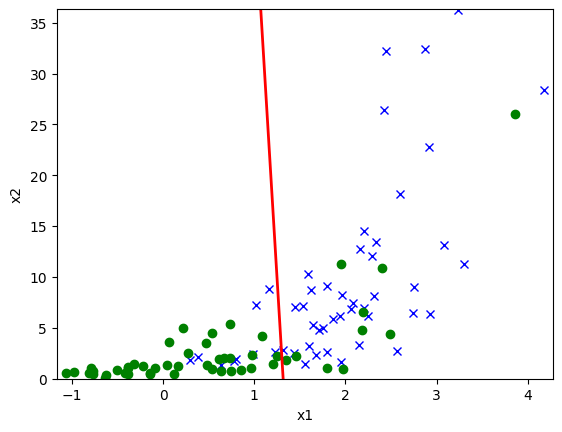

In [54]:
train_path = 'ds1_train.csv'
valid_path = 'ds1_valid.csv'
#save_path = 'GDA_pred_1.txt'

x_train, y_train = util.load_dataset(train_path, add_intercept=False)
x_test, y_test = util.load_dataset(valid_path, add_intercept=False)
Gaussian = GDA()
Gaussian.fit(x_train, y_train)
y_pred = Gaussian.predict(x_test)
accuracy = np.mean(y_pred == y_test)
print(f'accuracy: ', accuracy)
util.plot(x_test, y_test, theta=Gaussian.theta, save_path='GDA_pred_1.png')

In [ ]:
#x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=True)


In [48]:
if __name__ == '__main__':
    main(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='gda_pred_1.txt')

    main(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='gda_pred_2.txt')
